# **Extract Aadhar Details**

The proposed system aims to extract aadhar details like


*   First Name
*   Middle Name
*   Last Name
*   Date of Birth
*   Year of Birth (Old aadhar cards)
*   Aadhar Number
*   Gender




# Approach 1. Tesserect Method

installing pytesseract from pip

In [1]:
!apt-get install tesseract-ocr
!pip install pytesseract opencv-python


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (14.7 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

Importing necessary libraries

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

Uploading an aadhar image for extraction

In [3]:
from google.colab import files

uploaded = files.upload()


Saving fs.jpeg to fs.jpeg


Plotting the uploaded image (**Image take from kaggle**)

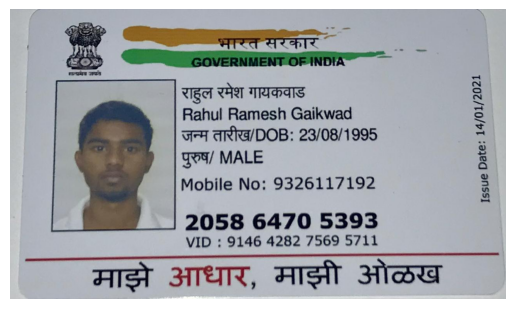

In [10]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

Converting to greyscale

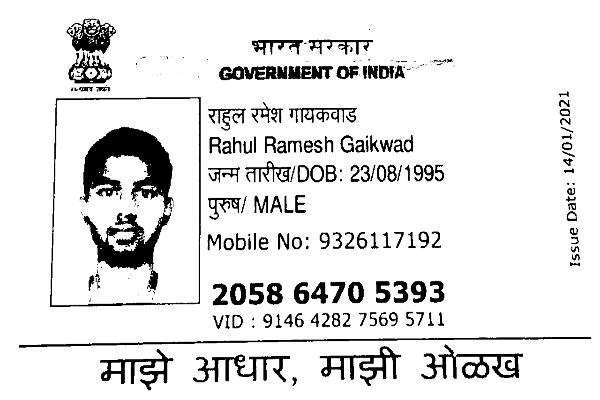

In [36]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 85, 255, cv2.THRESH_BINARY)

# Resize for better OCR accuracy
thresh = cv2.resize(thresh, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Display the preprocessed image
from google.colab.patches import cv2_imshow
desired_size = (600, 400)
thresh_resized = cv2.resize(thresh, desired_size)
cv2_imshow(thresh_resized)


In [37]:
# Perform OCR on the image
extracted_text = pytesseract.image_to_string(thresh_resized)

# Display the extracted text
print(extracted_text)


 

ST TTT
£2) GOVERNMENT OF INDIA

ge a MHATS

Rahul Ramesh Gaikwad
. WH ANAG/DOB: 23/08/1995

RY) MALE

\al Mobile No: 9326117192
foo

 

 

 

2058 6470 5393
VID ; 9146 4282 7569 S711

AS 31k, Ais How

Issue Date: 14/01/2021



Use Regular Expression to extract necessary information

In [39]:
import re

def extract_info(text):
    # Regular expressions to match name, DOB, and Aadhar number
    name_pattern = r"\n([A-Za-z ]+)\n.*DOB: (\d{2}/\d{2}/\d{4})" #NAme would be present on the line above DOB:
    aadhar_pattern = r"\n(\d{4} \d{4} \d{4})"

    # Extract name and DOB
    name_match = re.search(name_pattern, text)
    aadhar_match = re.search(aadhar_pattern, text)

    if name_match and aadhar_match:
        # Full name and DOB
        full_name = name_match.group(1).strip()
        dob = name_match.group(2)

        # Split name into first, middle, and last name
        name_parts = full_name.split()
        first_name = name_parts[0]
        middle_name = name_parts[1] if len(name_parts) > 2 else ''
        last_name = name_parts[-1] if len(name_parts) > 1 else ''

        # Aadhar number
        aadhar_number = aadhar_match.group(1)

        # Print extracted information
        print("First Name:", first_name)
        print("Middle Name:", middle_name)
        print("Last Name:", last_name)
        print("Date of Birth:", dob)
        print("Aadhar Number:", aadhar_number)

# Extract the information from the OCR output
info = extract_info(extracted_text)

# Print the extracted information
print(info)


First Name: Rahul
Middle Name: Ramesh
Last Name: Gaikwad
Date of Birth: 23/08/1995
Aadhar Number: 2058 6470 5393
None


This method does not work efficiently for all images and has low accuray to we go with EASYOCR

# **EASY OCR Approach**

Install easyocr

In [40]:
! pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 20.4 MB/s eta 0:00:00


import necessary libraries

In [41]:
import easyocr
reader = easyocr.Reader(['en', 'hi'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Read text from image

In [42]:
result = reader.readtext('fs.jpeg',paragraph=True)

In [43]:
result

[[[[533, 71], [599, 71], [599, 107], [533, 107]], 'भा'],
 [[[655, 71], [803, 71], [803, 107], [655, 107]], 'सरकार'],
 [[[463, 117], [869, 117], [869, 155], [463, 155]], 'GOVERNMENT OF INDIA'],
 [[[433, 185], [954, 185], [954, 476], [433, 476]],
  'राहुल रमेश गायकवाड Rahul Ramesh Gaikwad जन्म तारीख/D08: 23/08/1995 पुरुष/ MALE Mobile No: 9326117192'],
 [[[1181, 162], [1244, 162], [1244, 505], [1181, 505]], 'ड्ढै g्ल ङ्ल्'],
 [[[201, 515], [1126, 515], [1126, 734], [201, 734]],
  '2058 6470 5393 VID 0 9146 4282 7569 5711 माझे आधार माझी ओळख']]

In [45]:
import re

# Function to extract name, gender, DOB/Year of Birth, and Aadhaar number
def extract_info(ocr_result):
    first_name, middle_name, last_name, gender, dob, year_of_birth, aadhaar_number = None, None, None, None, None, None, None

    for item in ocr_result:
        text = item[1]

        # Check if the line contains Male or Female or their Hindi equivalents
        if re.search(r'Male|Female|पुरुष|महिला', text):
            # Extract first three English words as first, middle, and last names
            name_match = re.findall(r'[A-Za-z]+', text)
            if len(name_match) >= 3:
                first_name, middle_name, last_name = name_match[:3]

            # Determine gender
            if re.search(r'Male|पुरुष', text):
                gender = 'Male'
            elif re.search(r'Female|महिला', text):
                gender = 'Female'

            # Extract DOB or Year of Birth
            if 'DOB' or 'जन्म तारीख'  in text:
                dob_match = re.search(r'\b(\d{2}/\d{2}/\d{4})\b', text)
                dob = dob_match.group(1) if dob_match else None
            elif 'Year of Birth' in text or 'जन्म वर्ष' in text:
                yob_match = re.search(r'Year of Birth\s*:\s*([\d]+)', text)
                year_of_birth = yob_match.group(1) if yob_match else None

        # Extract Aadhaar number
        aadhaar_match = re.search(r'\b\d{4}\s\d{4}\s\d{4}\b', text)
        if aadhaar_match:
            aadhaar_number = aadhaar_match.group(0)

    # Return the extracted information
    return {
        "First Name": first_name,
        "Middle Name": middle_name,
        "Last Name": last_name,
        "Gender": gender,
        "DOB": dob,
        "Year of Birth": year_of_birth,
        "Aadhaar Number": aadhaar_number
    }

# Extract information from the result
extracted_info = extract_info(result)
print(extracted_info)


{'First Name': 'Rahul', 'Middle Name': 'Ramesh', 'Last Name': 'Gaikwad', 'Gender': 'Male', 'DOB': '23/08/1995', 'Year of Birth': None, 'Aadhaar Number': '2058 6470 5393'}


Output

In [48]:
for key, value in extracted_info.items():
    print(f"{key}: {value}")

First Name: Rahul
Middle Name: Ramesh
Last Name: Gaikwad
Gender: Male
DOB: 23/08/1995
Year of Birth: None
Aadhaar Number: 2058 6470 5393
